<a href="https://colab.research.google.com/github/A01703130/Evaluacion/blob/main/Eu_plt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=395103fc38d96dd45862a21f05d5cf18fbd31be064a8fe1338dc403e4a2551d7
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Carga desde un archivo .xlsx sin indice
cal= pd.read_csv('California-limpio-2.csv') 

In [ ]:
#Verificamos información del DataFrame
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6936 non-null   int64  
 1   listing_url                                   6936 non-null   object 
 2   scrape_id                                     6936 non-null   float64
 3   last_scraped                                  6936 non-null   object 
 4   source                                        6936 non-null   object 
 5   name                                          6936 non-null   object 
 6   description                                   6936 non-null   object 
 7   neighborhood_overview                         6936 non-null   object 
 8   picture_url                                   6936 non-null   object 
 9   host_id                                       6936 non-null   i

In [ ]:
#Imprimo los primeros 5 registro del dataframe
cal.head()

,Unnamed: 0,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,1,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,Sin registro,f,1,1,0,0,0.66
2,2,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,Sin registro,f,13,0,13,0,0.09
3,3,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,Sin registro,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,4,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(cal['host_identity_verified'])
table1

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,6106,0.880334,0.880334
1,f,830,0.119666,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table1[table1['frequency']>1]
Filtro

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,6106,0.880334,0.880334
1,f,830,0.119666,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_identity_verified')
Filtro_index

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,6106,0.880334,0.880334
f,830,0.119666,1.000000


<Axes: ylabel='frequency'>

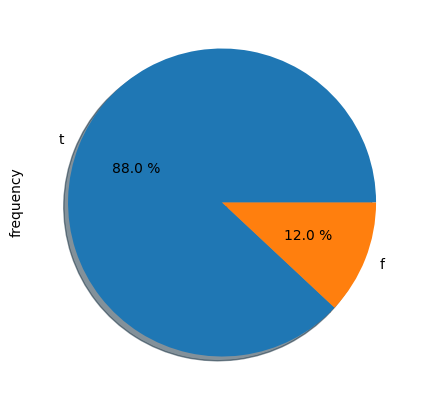

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(cal['host_acceptance_rate'])
table2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,2252,0.324683,0.324683
1,0,801,0.115484,0.440167
2,99%,540,0.077855,0.518022
3,97%,451,0.065023,0.583045
4,98%,258,0.037197,0.620242
...,...,...,...,...
82,27%,2,0.000288,0.999279
83,38%,2,0.000288,0.999567
84,48%,1,0.000144,0.999712
85,21%,1,0.000144,0.999856


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table2[table2['frequency']>200]
Filtro

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,2252,0.324683,0.324683
1,0,801,0.115484,0.440167
2,99%,540,0.077855,0.518022
3,97%,451,0.065023,0.583045
4,98%,258,0.037197,0.620242
5,91%,216,0.031142,0.651384


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_acceptance_rate')
Filtro_index

,frequency,percentage,cumulative_perc
host_acceptance_rate,,,
100%,2252,0.324683,0.324683
0,801,0.115484,0.440167
99%,540,0.077855,0.518022
97%,451,0.065023,0.583045
98%,258,0.037197,0.620242
91%,216,0.031142,0.651384


<Axes: ylabel='frequency'>

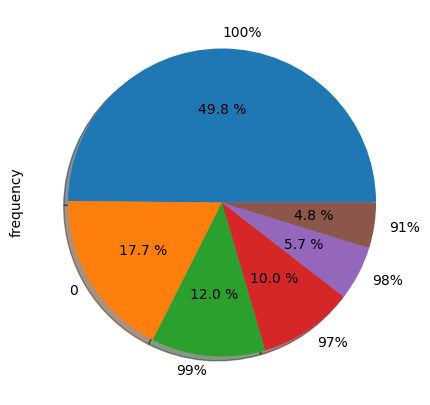

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(cal['host_response_time'])
table3

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,Sin registro,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table3[table3['frequency']>130]
Filtro

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,Sin registro,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_response_time')
Filtro_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4221,0.608564,0.608564
within a few hours,1111,0.160179,0.768743
Sin registro,1019,0.146915,0.915657
within a day,452,0.065167,0.980825
a few days or more,133,0.019175,1.000000


<Axes: ylabel='frequency'>

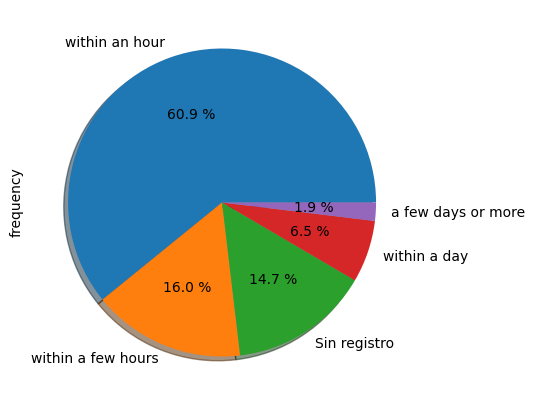

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(cal['property_type'])
table4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1848,0.266436,0.266436
1,Entire condo,879,0.126730,0.393166
2,Private room in home,853,0.122982,0.516148
3,Entire home,839,0.120963,0.637111
4,Entire guest suite,495,0.071367,0.708478
5,Private room in rental unit,471,0.067907,0.776384
6,Room in boutique hotel,352,0.050750,0.827134
7,Room in hotel,265,0.038206,0.865340
8,Private room in condo,192,0.027682,0.893022
9,Entire serviced apartment,145,0.020905,0.913927


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table4[table4['frequency']>350]
Filtro

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1848,0.266436,0.266436
1,Entire condo,879,0.126730,0.393166
2,Private room in home,853,0.122982,0.516148
3,Entire home,839,0.120963,0.637111
4,Entire guest suite,495,0.071367,0.708478
5,Private room in rental unit,471,0.067907,0.776384
6,Room in boutique hotel,352,0.050750,0.827134


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('property_type')
Filtro_index

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1848,0.266436,0.266436
Entire condo,879,0.126730,0.393166
Private room in home,853,0.122982,0.516148
Entire home,839,0.120963,0.637111
Entire guest suite,495,0.071367,0.708478
Private room in rental unit,471,0.067907,0.776384
Room in boutique hotel,352,0.050750,0.827134


<Axes: ylabel='frequency'>

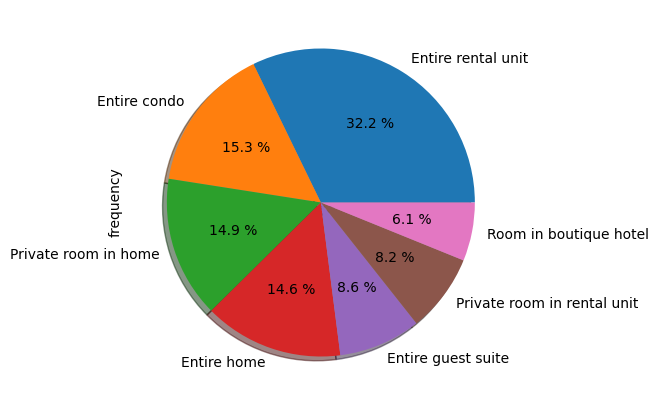

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [ ]:
cal.number_of_reviews=cal.number_of_reviews.astype(str)

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(cal['number_of_reviews'])
table5

,number_of_reviews,frequency,percentage,cumulative_perc
0,0,1325,0.191032,0.191032
1,1,578,0.083333,0.274366
2,2,402,0.057958,0.332324
3,3,292,0.042099,0.374423
4,4,243,0.035035,0.409458
...,...,...,...,...
459,360,1,0.000144,0.999423
460,438,1,0.000144,0.999567
461,362,1,0.000144,0.999712
462,555,1,0.000144,0.999856


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
Filtro= table5[table5['frequency']>290]
Filtro

,number_of_reviews,frequency,percentage,cumulative_perc
0,0,1325,0.191032,0.191032
1,1,578,0.083333,0.274366
2,2,402,0.057958,0.332324
3,3,292,0.042099,0.374423


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('number_of_reviews')
Filtro_index

,frequency,percentage,cumulative_perc
number_of_reviews,,,
0,1325,0.191032,0.191032
1,578,0.083333,0.274366
2,402,0.057958,0.332324
3,292,0.042099,0.374423


<Axes: ylabel='frequency'>

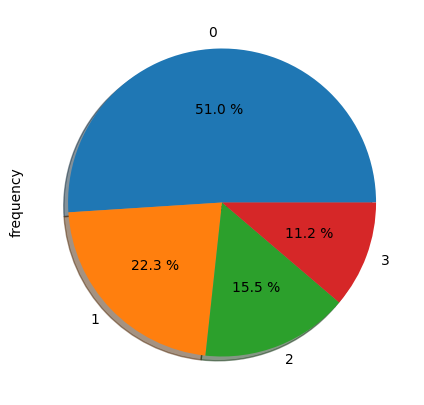

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")